In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

## Considering the infinite case
We get a Hamiltonian of the form 
$ \hat{H} = -t \sum_\mathbf{\delta} \sum_{\mathbf{k}} (e^{-i \mathbf{k}\cdot \mathbf{\delta}}\hat{a}^\dagger_\mathbf{k} \hat{b}_{\mathbf{k}} + H.c)$

$ \hat{H} = \sum_{\mathbf{k}} \mathbf{\Psi}^\dagger \mathbf{h(k)} \Psi$ \, where $ \Psi = \begin{pmatrix}  \hat{a_k}\\\hat{b_k}    \end{pmatrix}$ , $ \mathbf{h(k)} = -t\begin{bmatrix} 0 & \Delta_{k}\\ \Delta_{k}^\dagger &0    \end{bmatrix}$ ,
$ \Delta_{k} = \sum_{\delta} e^{i\mathbf{k}\cdot \delta}$

In [42]:
def Delta_k_func(k_vec, a_mag):
    """ Function to build off-diagonal components of h(k) """
    delta_1 = a_mag*0.5*np.array([np.sqrt(3), 1])
    delta_2 = a_mag*0.5*np.array([-np.sqrt(3), 1])
    delta_3 = -a_mag*np.array([0, 1])
    delta_vec = np.vstack([delta_1, delta_2, delta_3])
    
    exponent_vec = np.matmul(delta_vec, k_vec)
    Delta_k = np.sum(np.exp(1.0j*exponent_vec))
    
    return Delta_k

def build_h_matrix(k_x, k_y, a_mag, coupling, sigma_z):
    """ Building h(k) from Delta ks """
    k_vec = np.array([k_x, k_y])
    delta_k_from_func = Delta_k_func(k_vec, a_mag)
    delta_k_transpose = np.conjugate(delta_k_from_func)
    h_of_k = -coupling*np.array([[sigma_z, delta_k_from_func],[delta_k_transpose, -sigma_z]])

    return h_of_k

def find_eigvals(k_x, k_y, a_mag, coupling, sigma_z):
    """"""
    eig_band_1 = np.zeros((len(k_x), len(k_y)))
    eig_band_2 = np.zeros((len(k_x), len(k_y)))

    for i in range(len(k_x)):
            for j in range(len(k_y)):
                h_matrix = build_h_matrix(kx[i], ky[j], a_mag, coupling, sigma_z)

                eigvals, eigvecs = np.linalg.eigh(h_matrix)

                eig_band_1[i,j] = eigvals[0]
                eig_band_2[i,j] = eigvals[1]
                
    return eig_band_1, eig_band_2


In [51]:
# Defining Constants 
a_mag = 2
coupling = 1.0
mag_K = 4*np.pi/(3*np.sqrt(3)*a_mag)
# Specifying total k space
kx = np.linspace(-mag_K, mag_K, 100)
ky = np.linspace(-mag_K, mag_K, 100)
# Building meshgrid for plotting
kxv, kyv = np.meshgrid(kx, ky)
# Calculating bands
band_1, band_2 = find_eigvals(kx, ky, a_mag, coupling, 0)

## Plotting

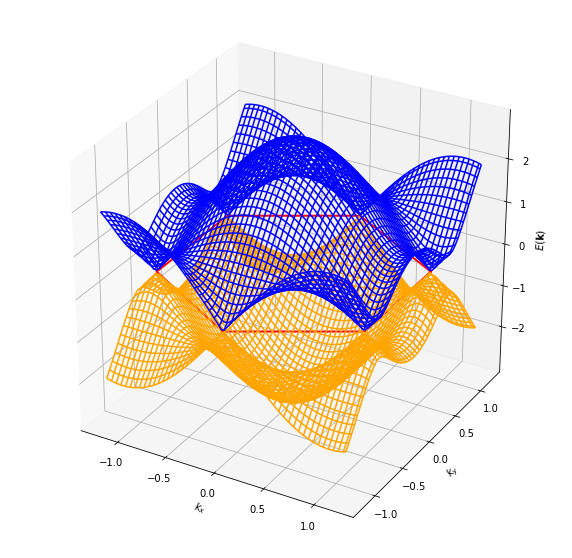

In [52]:


fig_3d = plt.figure(figsize=(10,10))
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Outlining a hexagon specifying Brillouin zone
hexagon_coord_x = np.array([2*np.pi/(3*a_mag), 0, -2*np.pi/(3*a_mag),
                            -2*np.pi/(3*a_mag), 0, 2*np.pi/(3*a_mag),2*np.pi/(3*a_mag)])
hexagon_coord_y = np.array([2*np.pi/(3*np.sqrt(3)*a_mag), mag_K,
                            2*np.pi/(3*np.sqrt(3)*a_mag), -2*np.pi/(3*np.sqrt(3)*a_mag),
                             -mag_K, -2*np.pi/(3*np.sqrt(3)*a_mag), 2*np.pi/(3*np.sqrt(3)*a_mag) ])
hexagon = ax_3d.plot(hexagon_coord_x, hexagon_coord_y, np.zeros(len(hexagon_coord_x)),
                     linestyle='-', linewidth=2, color='red')

# Plotting bands 
surf_1 = ax_3d.plot_wireframe(kxv, kyv, band_1, cmap=cm.coolwarm, antialiased=True, color='orange')
surf_2 = ax_3d.plot_wireframe(kxv, kyv, band_2, cmap=cm.coolwarm, antialiased=True, color='blue')
# Labels 
ax_3d.set_xlabel('$k_{x}$')
ax_3d.set_ylabel('$k_{y}$')
ax_3d.set_zlabel('$E(\mathbf{k})$')
plt.show()

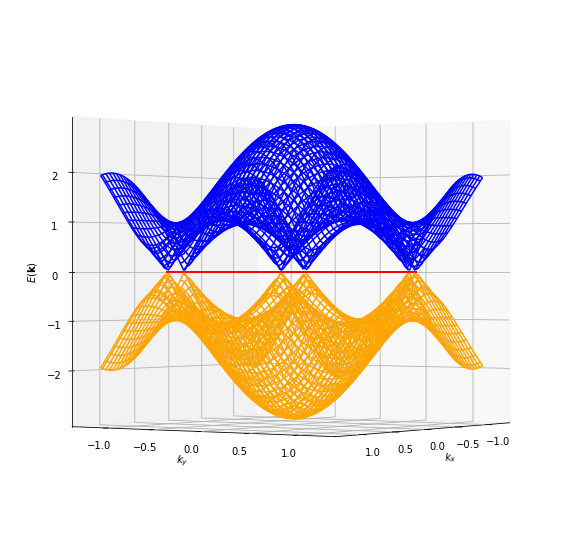

In [53]:
# Changing viewing angle to see Dirac cones
ax_3d.view_init(0, 35)
fig_3d

## Now we run it with a Sigma z term (on diagonal splitting)
 $ \mathbf{h(k)} = -t\begin{bmatrix} +M & \Delta_{k}\\ \Delta_{k}^\dagger & -M    \end{bmatrix}$ 

In [55]:
M = 0.5
band_1_split, band_2_split = find_eigvals(kx, ky, a_mag, coupling, M)

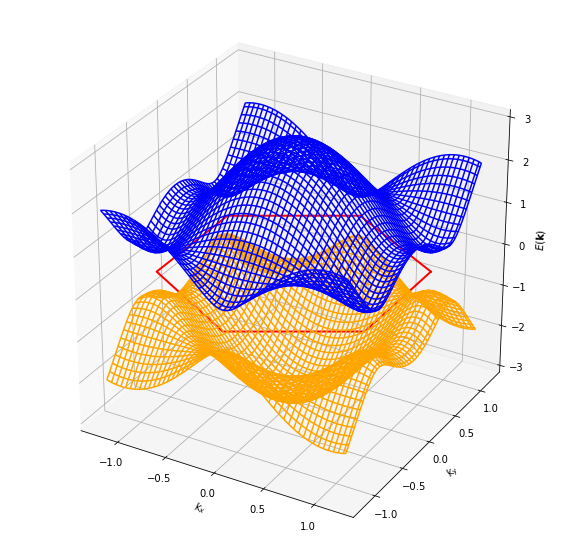

In [56]:
fig_3d_split = plt.figure(figsize=(10,10))
ax_3d_split = fig_3d_split.add_subplot(111, projection='3d')

hexagon = ax_3d_split.plot(hexagon_coord_x, hexagon_coord_y, np.zeros(len(hexagon_coord_x)),
                     linestyle='-', linewidth=2, color='red')

# Plotting bands 
surf_1 = ax_3d_split.plot_wireframe(kxv, kyv, band_1_split, cmap=cm.coolwarm, antialiased=True, color='orange')
surf_2 = ax_3d_split.plot_wireframe(kxv, kyv, band_2_split, cmap=cm.coolwarm, antialiased=True, color='blue')
# Labels 
ax_3d_split.set_xlabel('$k_{x}$')
ax_3d_split.set_ylabel('$k_{y}$')
ax_3d_split.set_zlabel('$E(\mathbf{k})$')
plt.show()

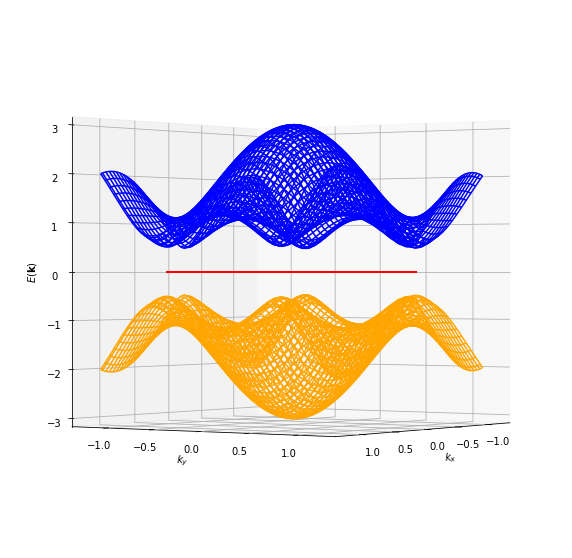

In [57]:
ax_3d_split.view_init(0, 35)
fig_3d_split